In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline

In [7]:
train = pd.read_csv('train.csv')

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Столбцы, содержащих мало данных, удаляем

In [10]:
train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

удаляем строки с отсутствующими значениями

In [11]:
train.dropna(inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

In [16]:
data = pd.get_dummies(train)

Разделим данные на Х и У

In [17]:
X = data.drop(['SalePrice'], axis=1)
Y = data.SalePrice

Разделим данные на тренировочные и тестовые

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

__Случайный лес и важность признаков__

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Считаем ошибку

In [20]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test))

MAE 19497.230547945208
MSE 851193339.7384964
RMSE 29175.217903873425
Score: 0.8868452967403304


Точность неплохая - 88,7%

Попробуем задать какие-нибудь параметры для случайного леса

In [21]:
model = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

In [22]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test))

MAE 23825.499946793225
MSE 1475342371.8224542
RMSE 38410.18578219134
Score: 0.8038730797150331


Точность значительно хуже.

Важность критериев

In [26]:
dt = pd.DataFrame(X.columns, model.feature_importances_).reset_index()
dt.columns = ['importance', 'name']
dt_imp = dt.loc[dt['importance'] > 0.01]
dt_imp

,importance,name
3,0.010576,LotArea
4,0.587380,OverallQual
9,0.028930,BsmtFinSF1
12,0.035744,TotalBsmtSF
13,0.024365,1stFlrSF
14,0.030445,2ndFlrSF
16,0.094664,GrLivArea
19,0.013192,FullBath
23,0.015266,TotRmsAbvGrd
26,0.020944,GarageCars


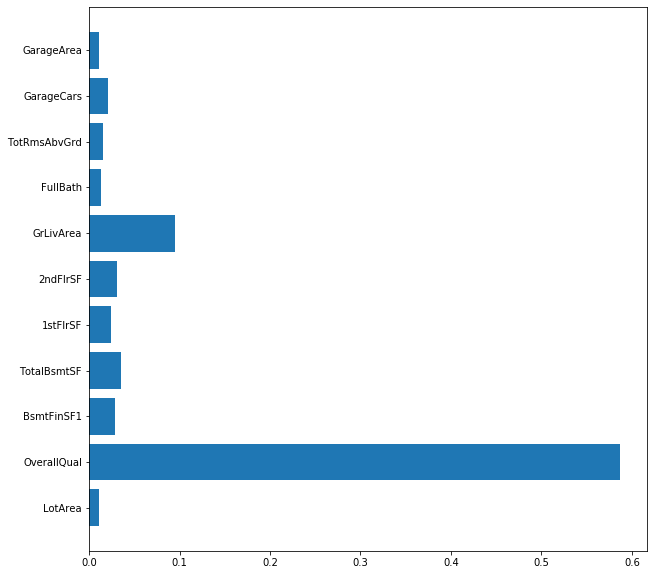

In [27]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
plt.barh(np.arange(len(dt_imp.importance)), dt_imp.importance)
plt.yticks(np.arange(len(dt_imp.name)),dt_imp.name)
plt.show()

Попробуем случайный лес только с важными критериями

In [28]:
X = data[['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
Y = data.SalePrice

In [29]:
model = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)

In [30]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test))

MAE 25209.81548320455
MSE 1570650608.7951248
RMSE 39631.43460430274
Score: 0.7912031318085351


Нет, качество стало только хуже.

Значит, выбираю Случайное дерево со всеми столбцами (первую модель)

__Стэкинг 3х моделей__

In [31]:
X = data.drop(['SalePrice'], axis=1)
Y = data.SalePrice

In [32]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [45]:
sr = StackingRegressor(
    [
        ('rf', RandomForestRegressor()),
        ('dt', DecisionTreeRegressor(),
         'lr', LinearRegression())
    ],
DecisionTreeRegressor())

In [39]:
sr.fit(x_train, y_train)
y_pred = sr.predict(x_test)

In [40]:
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(x_test, y_test))

MAE 31579.35616438356
MSE 3540572814.388128
RMSE 59502.71266411413
Score: 0.7912031318085351


Данные так себе - 79,1%